# Problem Statement

**With the exponential growth of digital content platforms, understanding the elements that contribute to a movie's success is more important than ever for producers, distributors, and streaming services. This project explores a dataset of over 10,000 movies, analyzing attributes such as genre, language, release timelines, popularity scores, audience ratings, and storyline descriptions. The goal is to uncover hidden patterns, genre-based trends, and content-driven themes that distinguish high-performing films, while also segmenting movies into meaningful groups based on their characteristics. Through a combination of exploratory data analysis, text-based insights, and clustering techniques, this project aims to derive actionable insights that mimic real-world data challenges in the entertainment and media industry.**


# Research Question

**What factors—such as genre, language, release period, and narrative themes—are most strongly associated with a movie’s success in terms of audience ratings and popularity, and how can we group similar movies based on these characteristics to uncover deeper content-based patterns?**


## Sub-Questions

1. What genres are most commonly associated with high audience ratings and popularity scores?

2. How do language and release periods (e.g, year or decade) influence the success of a movie?

3. What narrative themes or keywords appear most frequently in top-rated films?

4. Is there a noticeable pattern in how different genres perform over time?

5. Can we identify meaningful clusters to movies based on their numeric attributes and storyline content?

6. How do popularity and vote counts relate to each other, and what do they reveal about audience engagement?

7. Are certain combinations of genre and language more likely to lead to favorable outcomes?

## Setup & Load

In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv("/Users/harshbajpai/Projects/Netflix Project/Netflix_dataset.csv", lineterminator = '\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [12]:
print("Shape of dataset: ", df.shape)

Shape of dataset:  (9827, 9)


In [13]:
print("\nMissing values per column: \n", df.isnull().sum())


Missing values per column: 
 Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64


In [14]:
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


In this section, we loaded the movie metadata dataset containing 9,827 entries and 9 columns. We inspected the structure of the data, verified the datatypes, and checked for missing or duplicate values.<br>

- The dataset has no missing or duplicate values, which means it's clean and ready for transformation.
- All columns are fully populated, making it suitable for a robust analysis.
- Some columns like 'Release_Date', 'Genre', and 'Overview' will require formatting or feature extraction before they can be used effectively in analysis.

## Data Cleaning & Feature Preparation

In [17]:
# Converting Release_date to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors = 'coerce')

In [18]:
df['Release_Date'].dtype

dtype('<M8[ns]')

In [19]:
# Creating Release_Year and Release_Decade
df['Release_Year'] = df['Release_Date'].dt.year
df['Release_Decade'] = (df['Release_Year']//10) * 10

In [20]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Release_Year,Release_Decade
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021,2020
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022,2020
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,2022,2020
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,2021,2020
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,2021,2020


In [21]:
# Converting genre to list of genres
df['Genre_List'] = df['Genre'].apply(lambda x: [g.strip() for g in x.split(',')] if pd.notnull(x) else [])

In [22]:
df['Genre_List'].head(10)

0    [Action, Adventure, Science Fiction]
1              [Crime, Mystery, Thriller]
2                              [Thriller]
3    [Animation, Comedy, Family, Fantasy]
4      [Action, Adventure, Thriller, War]
5               [Action, Crime, Thriller]
6             [Horror, Mystery, Thriller]
7                              [Thriller]
8                [Action, Crime, Fantasy]
9                       [Science Fiction]
Name: Genre_List, dtype: object

In [23]:
# Create Num_Genres column
df['Num_Genres'] = df['Genre_List'].apply(len)

In [24]:
df['Num_Genres'].head()

0    3
1    3
2    1
3    4
4    4
Name: Num_Genres, dtype: int64

In [25]:
# Overview length (word count)
df['Overview_Words'] = df['Overview'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)

In [26]:
df[['Title', 'Genre_List', 'Num_Genres', 'Overview_Words', 'Release_Year', 'Release_Decade']].head()

,Title,Genre_List,Num_Genres,Overview_Words,Release_Year,Release_Decade
0,Spider-Man: No Way Home,"[Action, Adventure, Science Fiction]",3,45,2021,2020
1,The Batman,"[Crime, Mystery, Thriller]",3,28,2022,2020
2,No Exit,[Thriller],1,46,2022,2020
3,Encanto,"[Animation, Comedy, Family, Fantasy]",4,89,2021,2020
4,The King's Man,"[Action, Adventure, Thriller, War]",4,28,2021,2020


In this section, we prepared key features for analysis by formatting and enriching the raw dataset:

- Converted 'Release_Date' to datetime, and extracted 'Release_Year' and 'Release_Decade' to analyze temporal trends.
- Transformed the 'Genre' column into a list of individual genres ('Genre_List') and created a 'Num_Genres' column to capture genre diversity.
- Calculated the word count in each movie's 'Overview' to assess the richness of storyline descriptions.

<br>
These derived features will help us explore genre popularity, narrative patterns, and time-based trends in upcoming analysis.

## Theme setup

In [29]:
# Netflix-style color palette
netflix_palette = {
    'background': '#141414',
    'text': '#FFFFFF',
    'grid': '#333333',
    'primary': '#E50914',
    'accent': '#B81D24',
    'secondary': '#AAAAAA',
}

# Setting global plot style
plt.style.use('dark_background')
sns.set_style("darkgrid", {"axes.facecolor": netflix_palette['background']})

# Updating matplotlib params for global theme
plt.rcParams.update({
    'axes.facecolor': netflix_palette['background'],
    'axes.edgecolor': netflix_palette['grid'],
    'axes.labelcolor': netflix_palette['text'],
    'xtick.color': netflix_palette['text'],
    'ytick.color': netflix_palette['text'],
    'text.color': netflix_palette['text'],
    'figure.facecolor': netflix_palette['background'],
    'axes.titleweight': 'bold',
    'axes.titlesize': 14,
    'axes.titlecolor': netflix_palette['primary'],
    'axes.labelsize': 12,
    'axes.grid': True,
    'grid.color': netflix_palette['grid'],
})



## Exploratory Data Analysis

**Q. What genres are most represented in the dataset?**

In [32]:
# Exploding Genre_List to get one genre per row
genre_df = df.explode('Genre_List')

In [33]:
# Count frequency
genre_counts = genre_df['Genre_List'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']
genre_counts.head()

,Genre,Count
0,Drama,3744
1,Comedy,3031
2,Action,2686
3,Thriller,2488
4,Adventure,1853


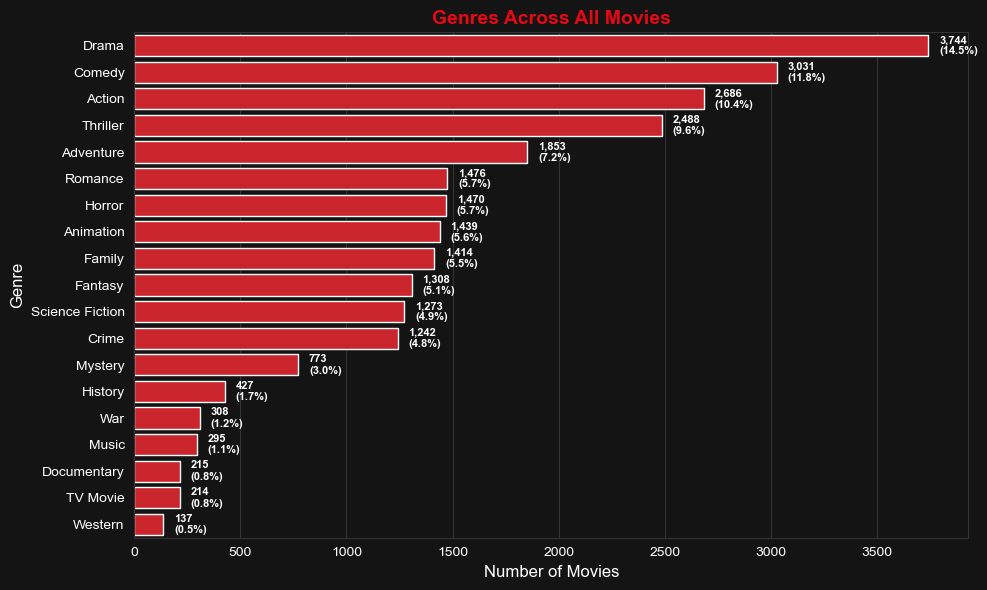

In [34]:
# Total movies
total_movies = genre_counts['Count'].sum()

# Plotting Genres
plt.figure(figsize = (10, 6))
ax = sns.barplot(
    data=genre_counts,
    y='Genre', x='Count',
    palette = [netflix_palette['primary']] * len(genre_counts)
)

# Annotate with bold count and percentage
for i, (count, genre) in enumerate(zip(genre_counts['Count'], genre_counts['Genre'])):
    percent = (count / total_movies) * 100
    label = f"{count:,}\n({percent:.1f}%)"
    ax.text(count + 50, i, label, va='center', fontweight='bold', fontsize=8, color='white')

plt.title ("Genres Across All Movies")
plt.xlabel ("Number of Movies")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

### Analysis

The dataset spans 18 distinct genres, with **Drama (14.9%)**, **Comedy (11.8%)**, and **Action (10.4%)** being the most dominant. These three account for nearly 40% of all movies. The distribution reflects industry trends where emotionally driven and entertaining content dominates global production. Niche genres like *Western*, *Documentary*, and *TV Movie* occupy a smaller share, highlighting more targeted or less mainstream content.

These insights set the foundation for further genre-based comparisons across ratings, popularity, and viewer engagement.

**Q. Are the most frequently produced genres also the most appreciated by audiences?**


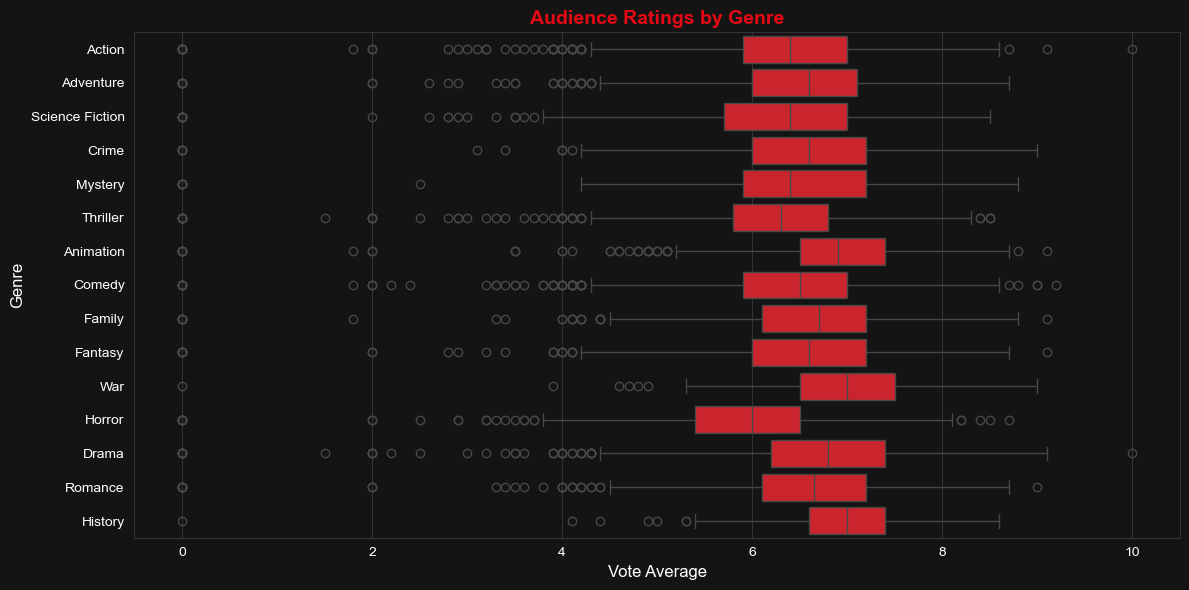

In [37]:
# Filter to only genres with a resonable number of movies
valid_genres = genre_counts.loc[genre_counts['Count'] >= 300, 'Genre']

# Filtering the exploded dataframe
filtered_df = genre_df[genre_df['Genre_List'].isin(valid_genres)]

# Creating a boxplot of Vote_Average by Genre
plt.figure(figsize=(12, 6))
ax = sns.boxplot(
    data=filtered_df,
    x='Vote_Average',
    y='Genre_List',
    palette=[netflix_palette['primary']] * len(valid_genres)
)

plt.title("Audience Ratings by Genre")
plt.xlabel("Vote Average")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

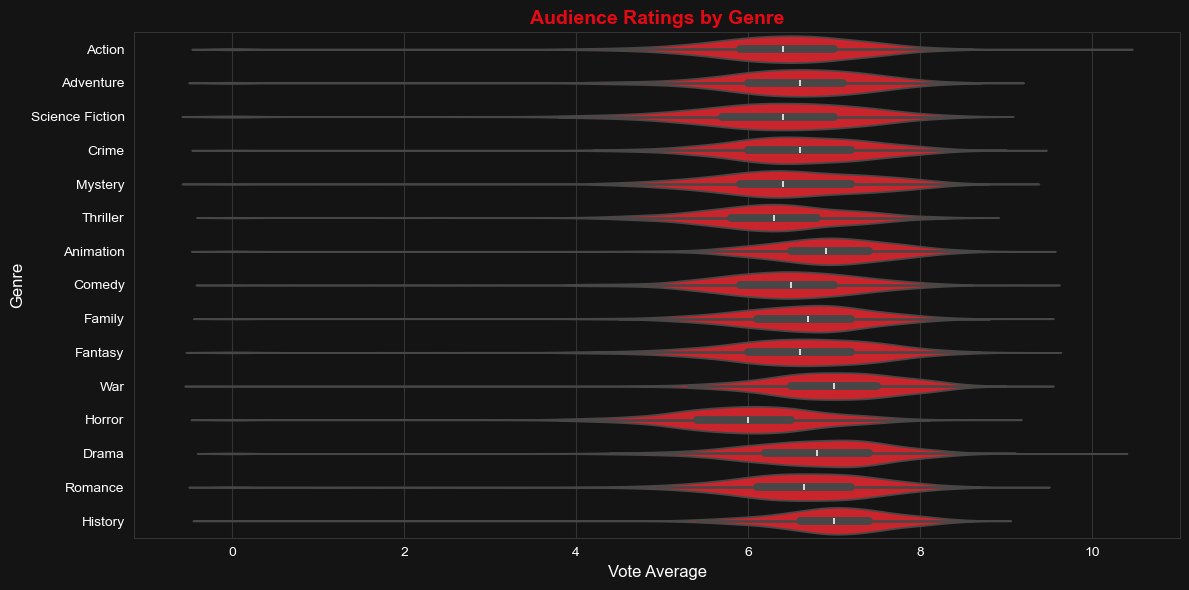

In [38]:
# Creating a boxplot of Vote_Average by Genre
plt.figure(figsize=(12, 6))
ax = sns.violinplot(
    data=filtered_df,
    x='Vote_Average',
    y='Genre_List',
    palette=[netflix_palette['primary']] * len(valid_genres)
)

plt.title("Audience Ratings by Genre")
plt.xlabel("Vote Average")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

### Analysis

This plot shows the median audience ratings for each genre with at least 300 movies.

While genres like Animation, War, and History have the highest medians and Horror and Thriller rank lower, the **actual difference in medians across genres is relatively small** (within ~1 rating point). This suggests that while genre provides some signal, it is **not a strong standalone predictor of audience rating**. So in further analysis we will explore additional features – such as storyline keywords, release year, and vote counts etc to better understand what drives a movie's success.


**Q. Which languages dominate the dataset, and do they influence movie ratings or popularity?**

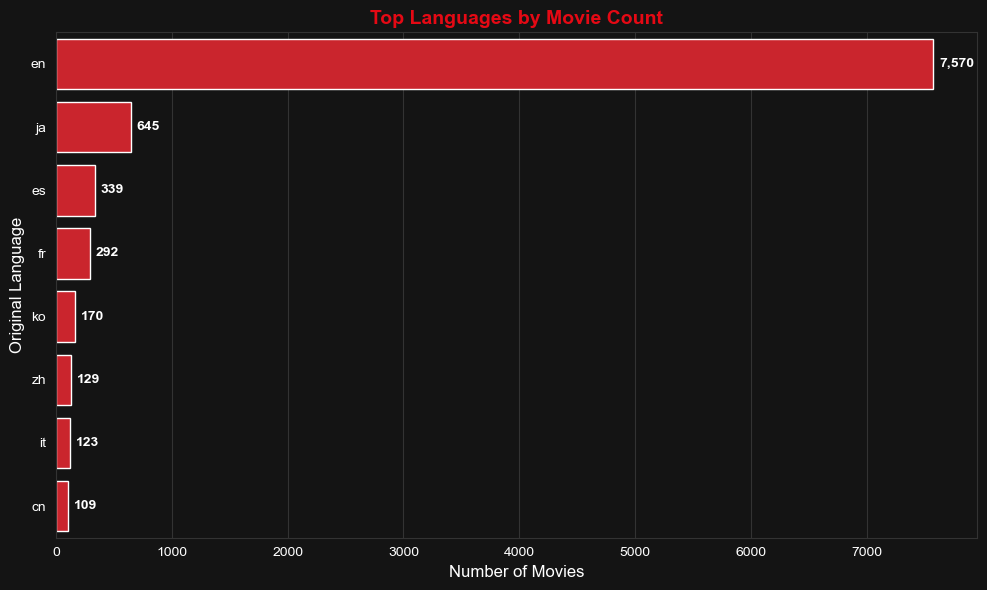

In [41]:
# Counting number of movies per language
lang_counts = df['Original_Language'].value_counts()
valid_langs = lang_counts[lang_counts >= 100].index

# Filtering dataset
filtered_lang_df = df[df['Original_Language'].isin(valid_langs)]

# Plotting Bar Chart —Language Distribution
plt.figure(figsize = (10,6))
ax = sns.barplot(
    x = lang_counts.loc[valid_langs].values,
    y = valid_langs,
    palette = [netflix_palette['primary']] * len(valid_langs)
)

for i, count in enumerate(lang_counts.loc[valid_langs].values):
    ax.text(count + 50, i, f"{count:,}", va='center', ha='left', fontweight='bold', fontsize=10, color='white')

plt.title("Top Languages by Movie Count")
plt.xlabel("Number of Movies")
plt.ylabel("Original Language")
plt.tight_layout()
plt.show()

While English content vastly overshadows others, the presence of Asian and European languages reflects global media diversity. A comparative look at how ratings vary by these languages is the next key layer.

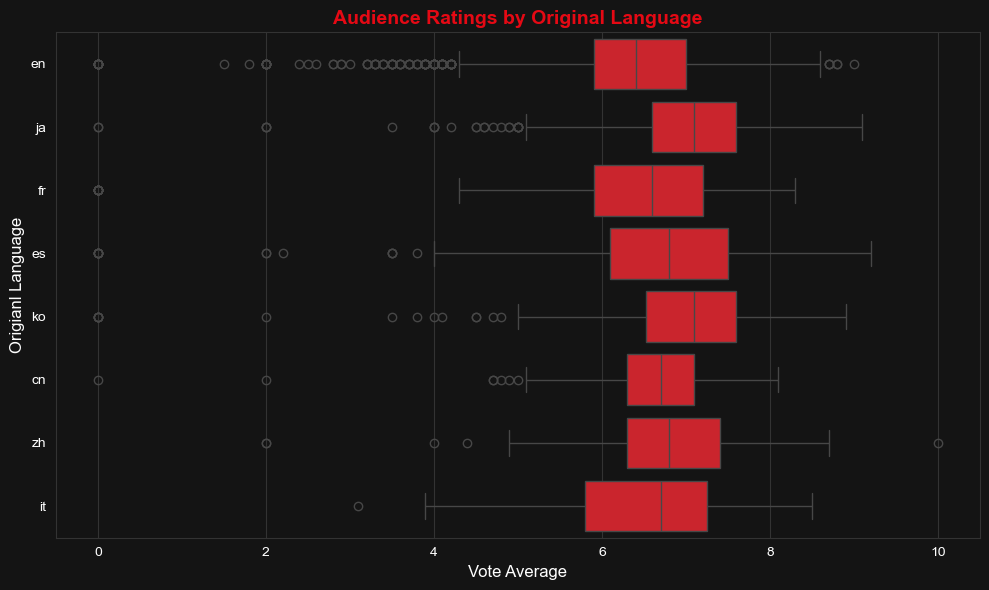

In [43]:
# Plotting  Boxplot - Vote_Average by language
plt.figure(figsize = (10,6))
sns.boxplot(
    data = filtered_lang_df,
    x = 'Vote_Average', 
    y = 'Original_Language',
    palette = [netflix_palette['primary']] * len(valid_langs)
)
plt.title("Audience Ratings by Original Language")
plt.xlabel("Vote Average")
plt.ylabel("Origianl Language")
plt.tight_layout()
plt.show()

- No language drastically outperforms others — most medians lie between 6.2 and 7.1
- English dominates by count, buy other languages (like Korean, French, Chinese) show competitive quality (based on median ratings).
- Smaller language groups (like Italian, Chinese) may show skewed trends due to fewer samples.

**Q. How movie trends and audience ratings have changes over time.**

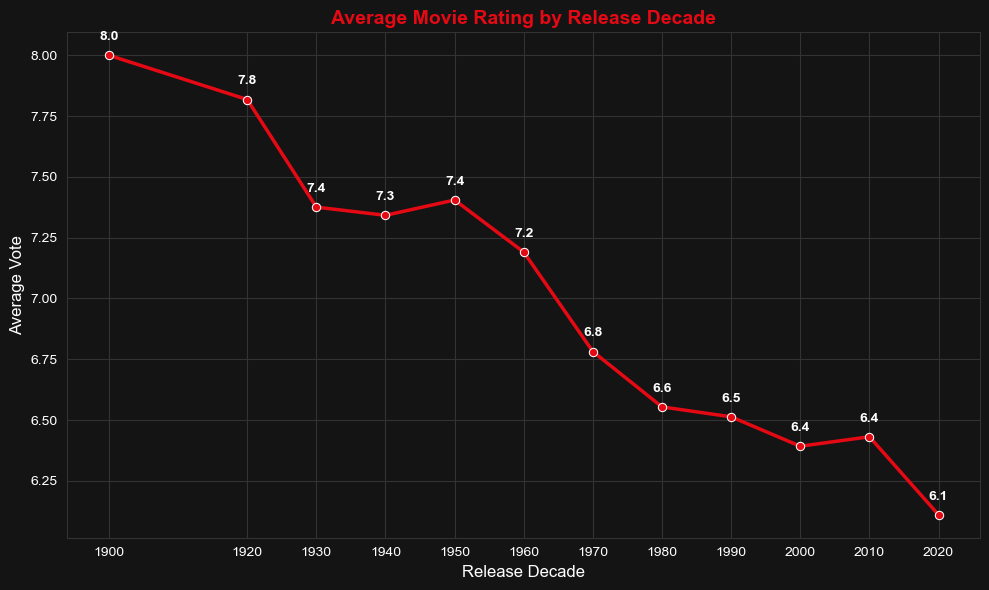

In [46]:
# Grouping and calculating mean rating per decade
decade_avg = df.groupby('Release_Decade')['Vote_Average'].mean().reset_index()

# Plotting rating trend over decades
plt.figure(figsize = (10,6))
sns.lineplot(
    data = decade_avg,
    x = 'Release_Decade',
    y = 'Vote_Average',
    marker = 'o',
    linewidth = 2.5,
    color=netflix_palette['primary']
)

for x, y in zip(decade_avg['Release_Decade'], decade_avg['Vote_Average']):
    plt.text(x, y+0.05, f"{y:.1f}", ha='center', va='bottom', fontsize=10, fontweight='bold', color='white')

plt.title("Average Movie Rating by Release Decade")
plt.xlabel("Release Decade")
plt.ylabel("Average Vote")
plt.xticks(decade_avg['Release_Decade'])
plt.tight_layout()
plt.show()
    

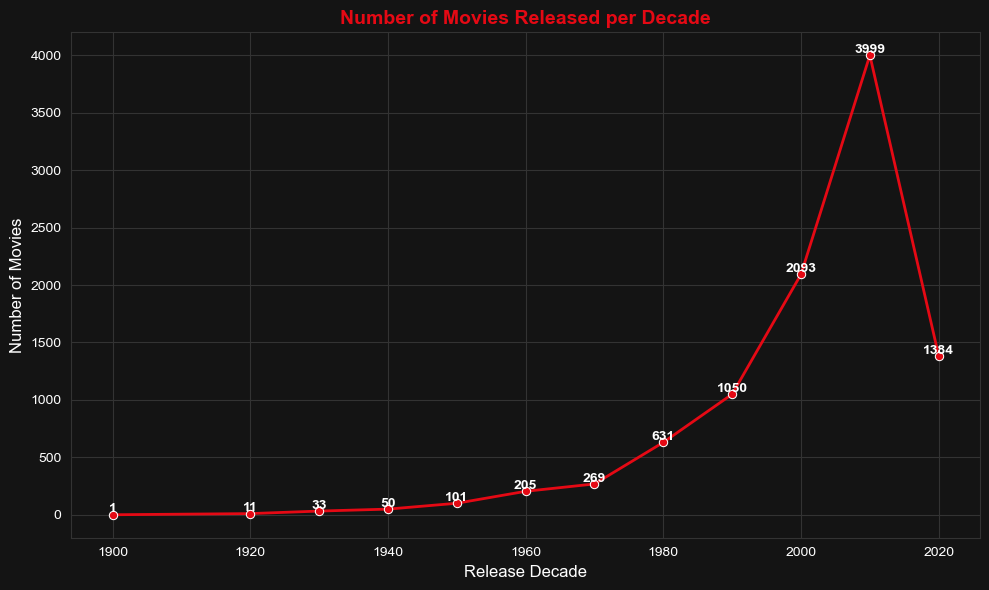

In [47]:
# Counting number of movies per release decade
decade_counts = df['Release_Decade'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10,6))
sns.lineplot(
    x = decade_counts.index,
    y = decade_counts.values,
    marker = 'o',
    color = netflix_palette['primary'],
    linewidth=2
)

for x, y in zip(decade_counts.index, decade_counts.values):
    plt.text(x,y + 20, f"{y}", ha='center', fontsize=10, fontweight='bold', color='white')

plt.title("Number of Movies Released per Decade", fontsize=14, color=netflix_palette['primary'], fontweight='bold')
plt.xlabel("Release Decade")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.show()

#### Insight:
Although the number of movies has grown over time, the average audience satisfaction appears to have gradually declined—highlighting an opportunity for content curators and streaming platforms to re-examine what drives quality over quantity.

Inverse Relationship: While quantity of movies has gone up sharply post-2000s, the average rating has declined — indicating:
- Market saturation and content overload.
- Difficulty maintaining consistent quality
- Viewers being more critical with more options

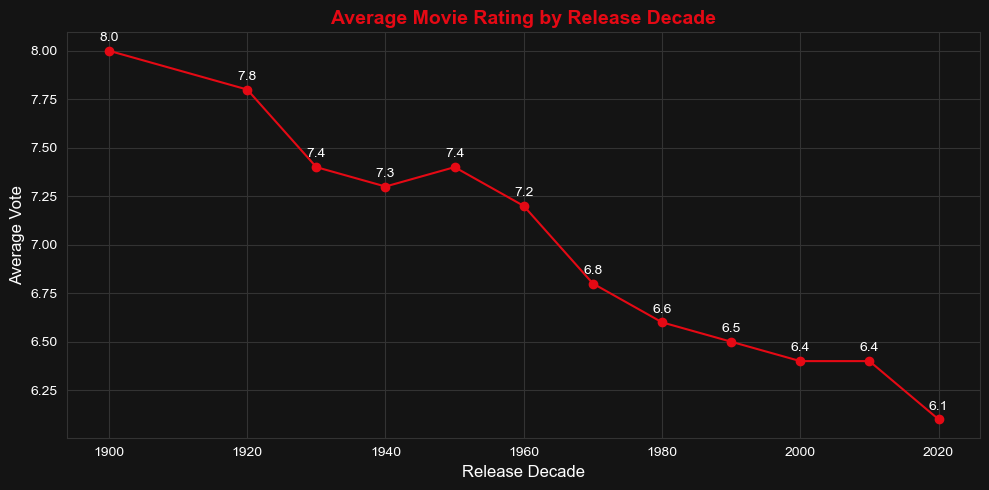

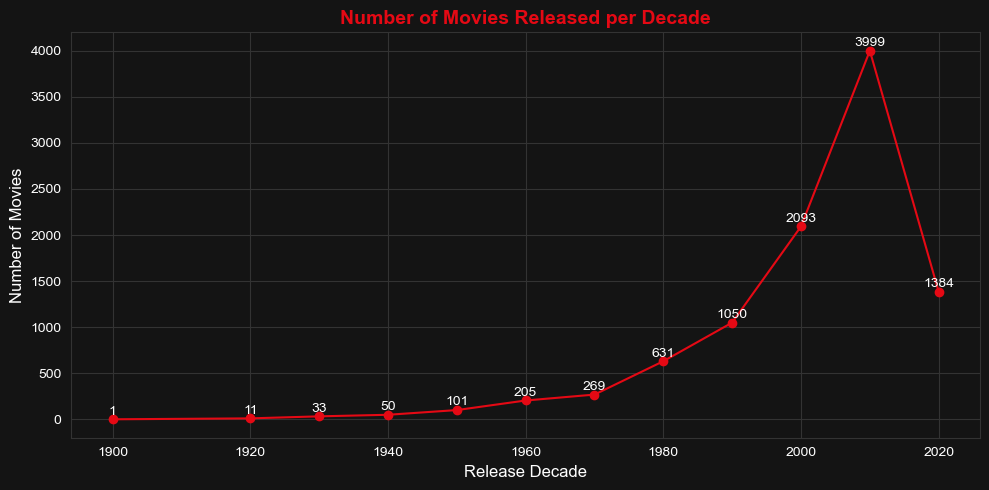

In [53]:
# Aggregating average ratings and movie count per release decade
decade_stats = df.groupby('Release_Decade')['Vote_Average'].agg(['mean', 'count']).reset_index()

# Extract values
decades = decade_stats['Release_Decade'].tolist()
avg_ratings = decade_stats['mean'].round(1).tolist()
movie_counts = decade_stats['count'].tolist()

# Plotting average rating by decade
plt.figure(figsize=(10, 5))
plt.plot(decades, avg_ratings, marker='o', color=netflix_palette['primary'])
for x, y in zip(decades, avg_ratings):
    plt.text(x, y + 0.05, f'{y:.1f}', ha='center', fontsize=10, color='white')
plt.title("Average Movie Rating by Release Decade", fontsize=14, fontweight='bold', color=netflix_palette['primary'])
plt.xlabel("Release Decade")
plt.ylabel("Average Vote")
plt.tight_layout()
plt.show()

# Plotting movie count by decade
plt.figure(figsize=(10, 5))
plt.plot(decades, movie_counts, marker='o', color=netflix_palette['primary'])
for x, y in zip(decades, movie_counts):
    plt.text(x, y + 50, f'{y}', ha='center', fontsize=10, color='white')
plt.title("Number of Movies Released per Decade", fontsize=14, fontweight='bold', color=netflix_palette['primary'])
plt.xlabel("Release Decade")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.show()

**Q. What narrative themes or keywords appear most frequently in top-rated films?**

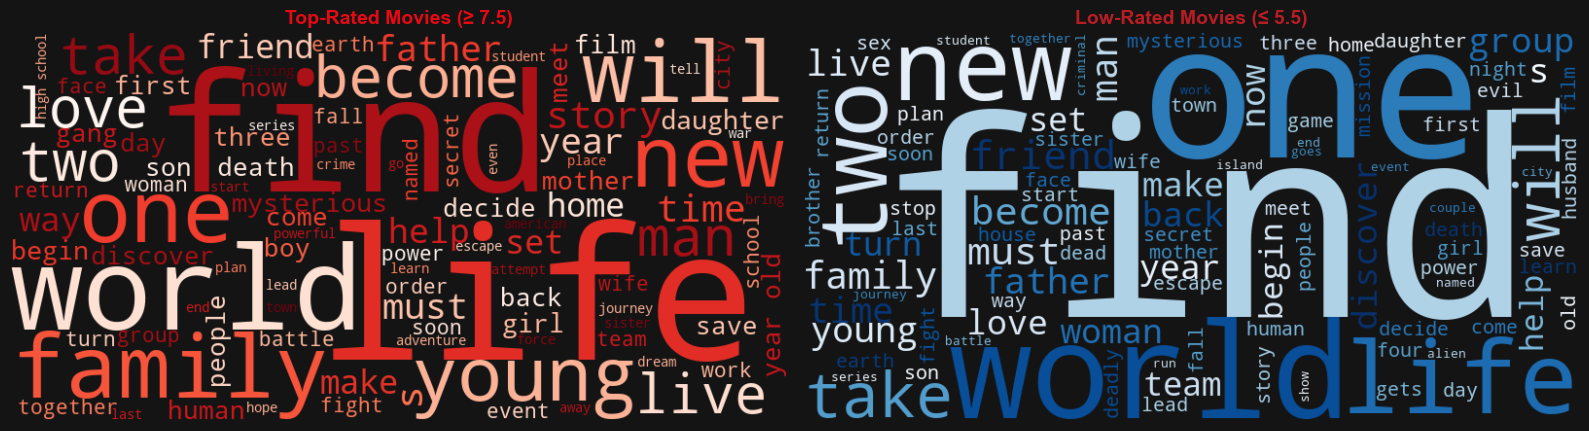

In [64]:
# Creating stopwords list
stopwords = set(STOPWORDS)

# Splitting high-rated and low-rated movies
high_rated = df[df['Vote_Average'] >= 7.5]
low_rated = df[df['Vote_Average'] <= 5.5]

# Combining all overviews into one string
high_text = ' '.join(high_rated['Overview'].dropna().astype(str).str.lower())
low_text = ' '.join(low_rated['Overview'].dropna().astype(str).str.lower())

# Creating word clouds
high_wc = WordCloud(width=800, height=400, background_color='#141414', colormap='Reds',
                    stopwords=stopwords, max_words=100).generate(high_text)

low_wc = WordCloud(width=800, height=400, background_color='#141414', colormap='Blues',
                   stopwords=stopwords, max_words=100).generate(low_text)

# Plotting both word clouds
plt.figure(figsize=(16, 7))

plt.subplot(1, 2, 1)
plt.imshow(high_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Top-Rated Movies (≥ 7.5)", fontsize=14, color='#E50914', fontweight='bold')

plt.subplot(1, 2, 2)
plt.imshow(low_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Low-Rated Movies (≤ 5.5)", fontsize=14, color='#B81D24', fontweight='bold')

plt.tight_layout()
plt.show()

The word clouds highlight key differences in the themes of high- and low-rated movies:

- **Top-Rated Movies($\geq$ 7.5)** tend to emphasize emotional and relatable themes, with frequent words like "love", "life", "family", "journey", and "story", suggesting strong narrative and personal depth.
- **Low-Rated Movies($\leq$ 5.5)** often include more generic or darker terms such as "group", "mission", "order", and "kill", hinting at formulaic or less engaging plots.
- **Shared terms** like "find" and "one" appear in both, but their impact likely differs based on context and supporting narrative.

<br>

**Emotional resonance and rich storytelling may play a key role in higher audience ratings.**

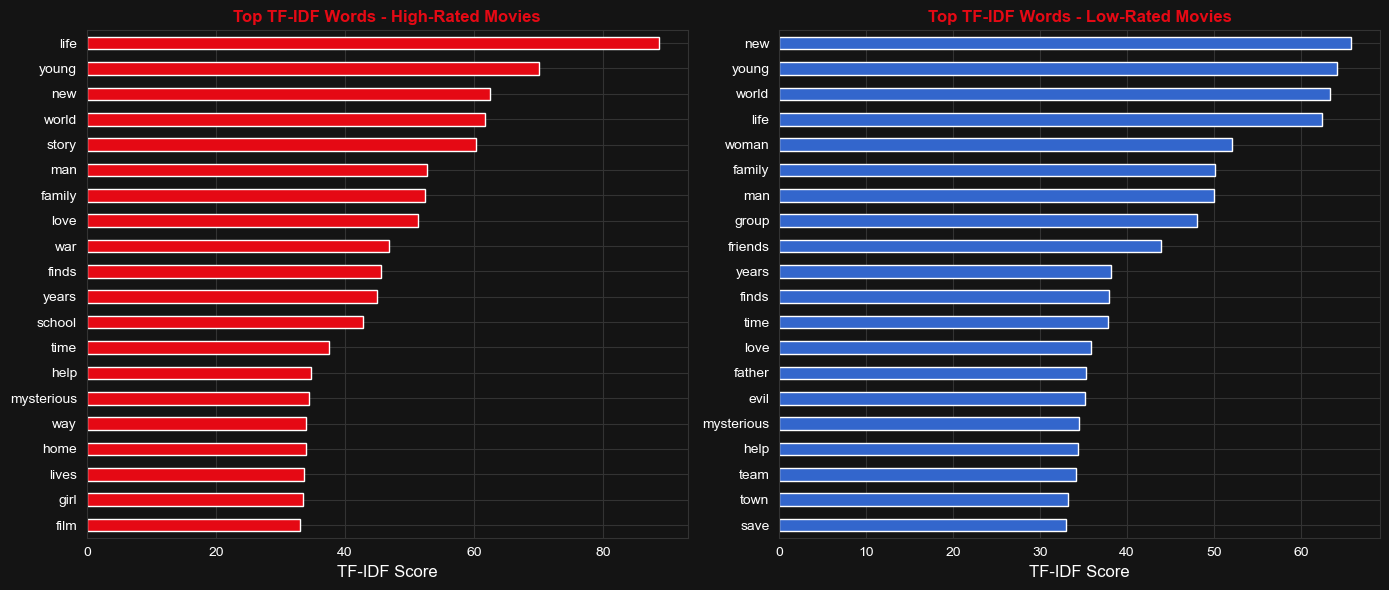

In [62]:
# Defining basic preprocessing function
def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    return text

# Filtering and clean overviews
high_rated = df[df['Vote_Average'] >= 7.5]['Overview'].dropna().astype(str).apply(clean_text)
low_rated = df[df['Vote_Average'] <= 5.5]['Overview'].dropna().astype(str).apply(clean_text)

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=100)

high_tfidf = vectorizer.fit_transform(high_rated)
high_words = pd.DataFrame(high_tfidf.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False).head(20)

low_tfidf = vectorizer.fit_transform(low_rated)
low_words = pd.DataFrame(low_tfidf.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False).head(20)

# Plotting
plt.figure(figsize=(14, 6))

# High-rated TF-IDF barplot
plt.subplot(1, 2, 1)
high_words[::-1].plot(kind='barh', color='#E50914')
plt.title("Top TF-IDF Words - High-Rated Movies", fontsize=12)
plt.xlabel("TF-IDF Score")

# Low-rated TF-IDF barplot
plt.subplot(1, 2, 2)
low_words[::-1].plot(kind='barh', color='#3366cc')
plt.title("Top TF-IDF Words - Low-Rated Movies", fontsize=12)
plt.xlabel("TF-IDF Score")

plt.tight_layout()
plt.show()

**High-rated movies often carry emotionally resonant and human-centered storytelling, while low-rated movies seem to rely more on common action or shallow ensemble structures.**

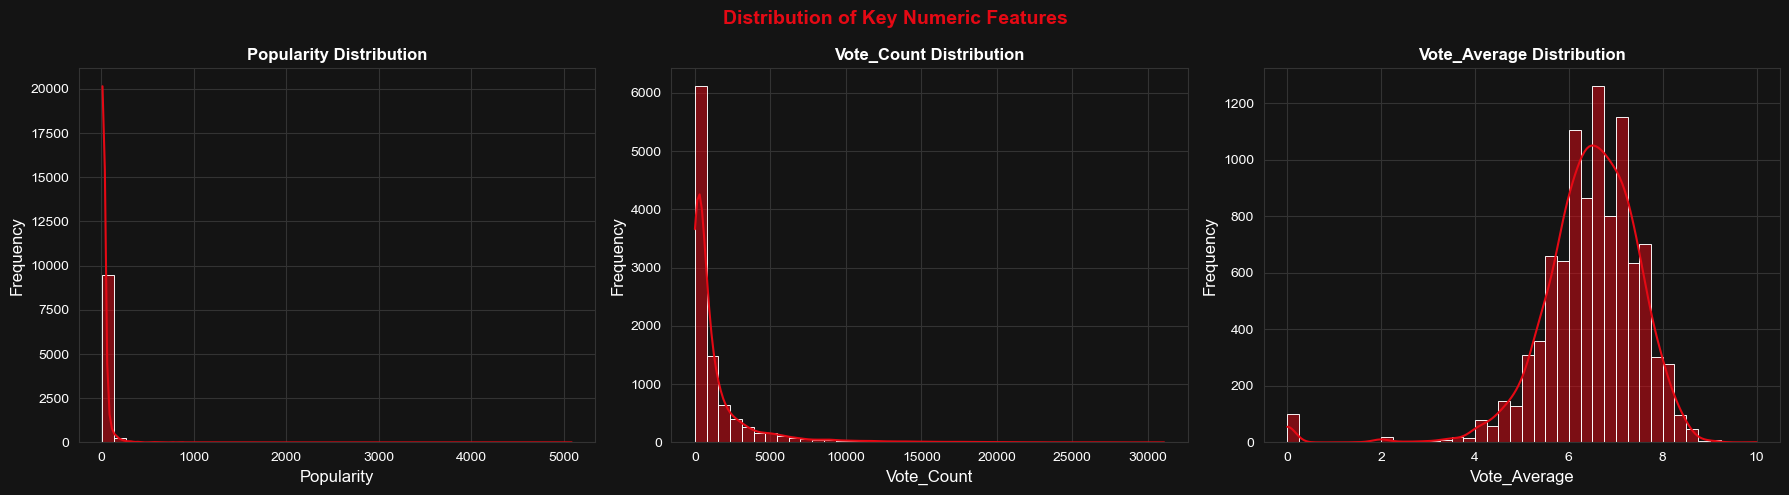

In [73]:
# Selecting relevant numeric columns
numeric_cols = ['Popularity', 'Vote_Count', 'Vote_Average']

# Plotting distributions
plt.figure(figsize=(18, 5))

for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=40, color=netflix_palette['primary'])
    plt.title(f"{col} Distribution", color=netflix_palette['text'], fontsize=12, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.suptitle("Distribution of Key Numeric Features", color=netflix_palette['primary'], fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


- Popularity and Vote_Count are heavily right-skewed, meaning msot movies receive relatively low attention while a few achieve very high visibility.
- Vote_Average, in contrast, is more normally distributed, peaking between 6 and 7.5, indicating that audiences generally rate most movies within this range.
- This suggests that while most movies are rated somewhat similarly, only a select few gain viral popularity or a large number of votes.

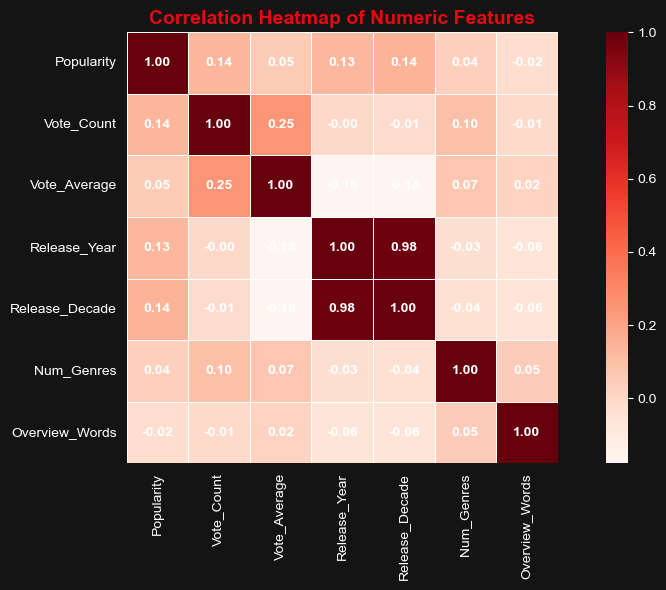

In [78]:
# Selecting numeric columns
numberic_cols = df.select_dtypes(include='number')

# Computing correlation matrix
corr_matrix = numberic_cols.corr()

# Plotting heatmap 
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="Reds",
    linewidths=0.5,
    cbar=True,
    square=True,
    annot_kws={"color": "white", "fontsize": 10, "weight": "bold"}
)

plt.title("Correlation Heatmap of Numeric Features", color=netflix_palette['primary'], fontsize=14, weight='bold')
plt.xticks(color=netflix_palette['text'])
plt.yticks(color=netflix_palette['text'])
plt.tight_layout()
plt.show()

Overall, the correlations are generally weak, implying limited multicollinearity and a diverse set of influencing factors.

In [87]:
# Filtering out movies with very few votes to avoid noise
filtered_df = df[df['Vote_Count'] >= 1000]

# Top 10 by Vote Average
top_rated = filtered_df.sort_values(by='Vote_Average', ascending=False).head(10)[['Title', 'Vote_Average', 'Vote_Count']]

# Top 10 by Popularity
top_popular = df.sort_values(by='Popularity', ascending=False).head(10)[['Title', 'Popularity']]

# Top 10 by Vote Count
top_voted = df.sort_values(by='Vote_Count', ascending=False).head(10)[['Title', 'Vote_Count']]

# Display results
print("Top 10 Movies by Average Rating (min 1000 votes):")
display(top_rated)

print("\nTop 10 Movies by Popularity:")
display(top_popular)

print("\nTop 10 Movies by Vote Count:")
display(top_voted)


Top 10 Movies by Average Rating (min 1000 votes):


,Title,Vote_Average,Vote_Count
609,The Godfather,8.7,15614
3146,Dilwale Dulhania Le Jayenge,8.7,3474
657,The Shawshank Redemption,8.7,20911
1317,Schindler's List,8.6,12474
1007,The Godfather: Part II,8.6,9393
221,The Dark Knight,8.5,26994
1704,"The Good, the Bad and the Ugly",8.5,6479
1759,GoodFellas,8.5,9860
1312,Pulp Fiction,8.5,22733
5445,Cinema Paradiso,8.5,3259



Top 10 Movies by Popularity:


,Title,Popularity
0,Spider-Man: No Way Home,5083.954
1,The Batman,3827.658
2,No Exit,2618.087
3,Encanto,2402.201
4,The King's Man,1895.511
5,The Commando,1750.484
6,Scream,1675.161
7,Kimi,1601.782
8,Fistful of Vengeance,1594.013
9,Eternals,1537.406



Top 10 Movies by Vote Count:


,Title,Vote_Count
380,Inception,31077
461,Interstellar,27975
221,The Dark Knight,26994
138,The Avengers,26490
195,Deadpool,26390
92,Avatar,25011
71,Avengers: Infinity War,24079
1223,Guardians of the Galaxy,24024
407,Fight Club,23620
1312,Pulp Fiction,22733


This section highlights how different metrics—average rating, popularity, adn vote count—offer unique perspectives on a movie's success:

- **Top-rate movies** (e.g., The Godfather, Shawshank Redemption) represent critically acclaimed classics with consistently high audience ratings ($\geq$8.5), filtered to include only movies with $\geq$1000 votes to avoid bias from low-sample reviews.

- **Most Popular Movies** (e.g., Spieder-Man: No Way Home, The Batman) refects recent blockbusters generating significant current interest and social buzz.

- **Most Voted Movies** (e.g., Inception, Interstellar, Avengers) show widespread audience engagement and mass viewership over time.

<br>
Together, these lists reveals how quality, trendiness, and audience reach intersect, but don't always align.


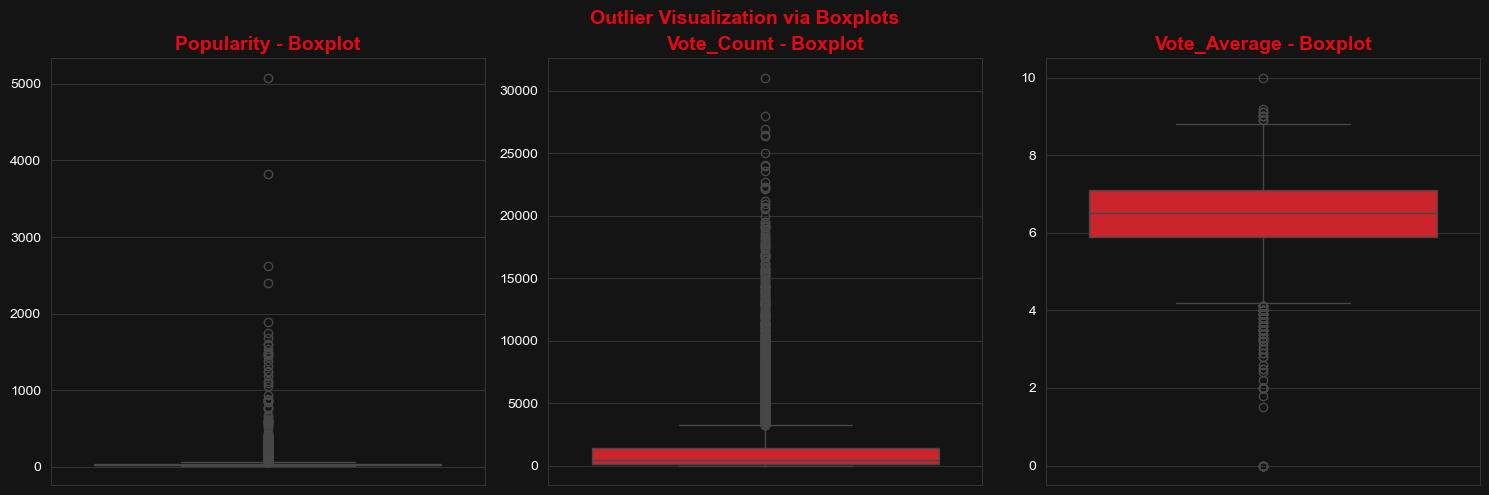

Total rows with outliers in any numeric column: 1975


In [102]:
#  Boxplot Visualization 
plt.figure(figsize=(15, 5))

for i, col in enumerate(['Popularity', 'Vote_Count', 'Vote_Average']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=df, y=col, color=netflix_palette['primary'])
    plt.title(f"\n{col} - Boxplot")
    plt.ylabel('')
    plt.tight_layout()

plt.suptitle("Outlier Visualization via Boxplots", color=netflix_palette['primary'], fontsize=14, fontweight='bold')
plt.show()

# IQR-Based Outlier Detection 
outlier_flags = pd.DataFrame()

for col in ['Popularity', 'Vote_Count', 'Vote_Average']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    is_outlier = ~df[col].between(lower_bound, upper_bound)
    outlier_flags[col + '_outlier'] = is_outlier

# Add a new column summarizing outlier presence
df['Outlier_Sum'] = outlier_flags.sum(axis=1)
outliers = df[df['Outlier_Sum'] > 0]

print(f"Total rows with outliers in any numeric column: {outliers.shape[0]}")


**Q. Is there a noticeable pattern in how different genres perform over time?**
<br>
We'll analyze average audience ratings (Vote_Average) by genre across decades (Release_Decade) to spot trends.

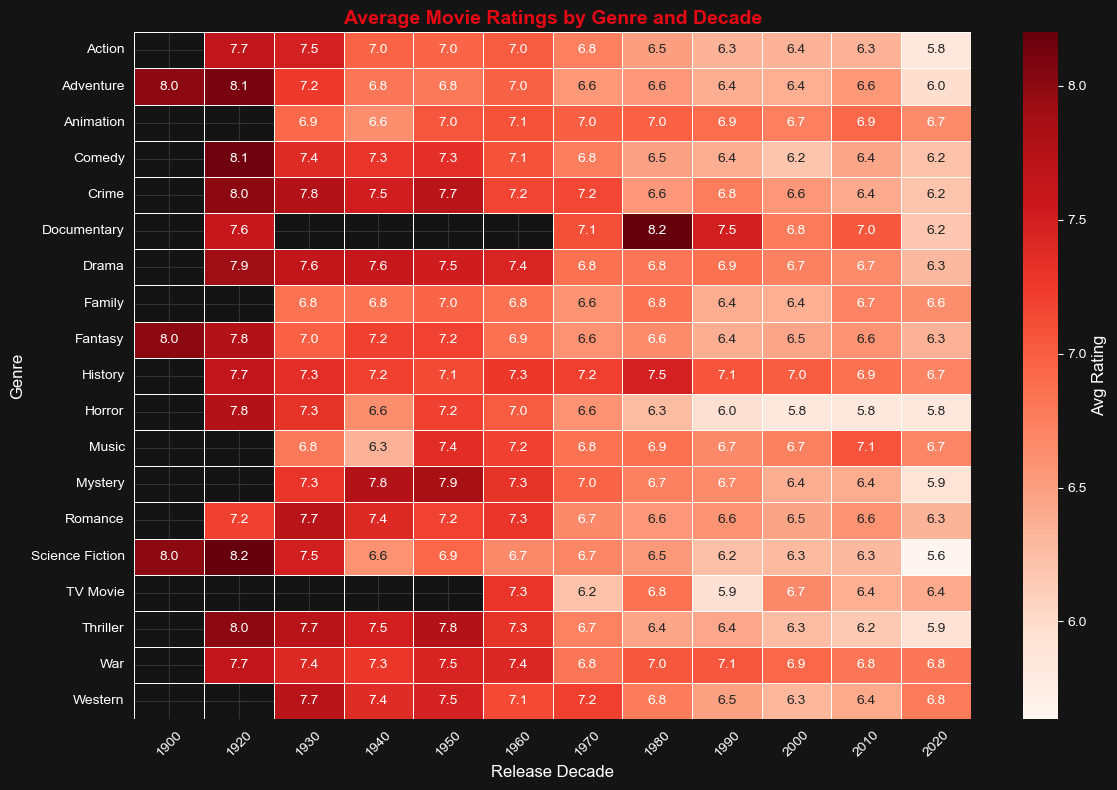

In [112]:
# Grouping and computing average rating by Genre and Decade
genre_decade_avg = genre_df.groupby(['Genre_List', 'Release_Decade'])['Vote_Average'].mean().reset_index()

# Pivot to create a matrix for heatmap
heatmap_data = genre_decade_avg.pivot(index='Genre_List', columns='Release_Decade', values='Vote_Average')

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="Reds", linewidths=0.5, cbar_kws={'label': 'Avg Rating'})

plt.title("Average Movie Ratings by Genre and Decade", fontsize=14, color=netflix_palette['primary'], weight='bold')
plt.xlabel("Release Decade")
plt.ylabel("Genre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This heatmap reveals how average audience ratings for different genres have evolved over time:

- Early Decades(1900x-1930): Genres like Adventure, Crime, Fantasy, and Science Fiction consistently received high ratings ($\geq$8.0), indicating strong audience reception in the early cinematic era.
- Post-1980 Decline: Most genres saw a gradual decline in ratings after the 1980s, mirroring the overall downward trend in average movie ratings over time.
- Consistent Performers: Drama, History, and Romance remained relatively stable in ratings over the decades, typically ranging between 6.5 and 7.5.
- Notable Declines: Horror and Science Fiction saw steep drops in recent decades, with some falling below 6.0, potentially due to repetitive or low-quality productions. TV Movies and Music genres consistently underperformed, rarely crossing the 7.0 mark.
- Recent Uplifts: Some genres like Western and Romance showed slightly improvements in the 2020x, possibly due to niche audience interest or evolving storytelling styles.

**Q. Are certain combinations of genre and language more likely to lead to favorable outcomes?**

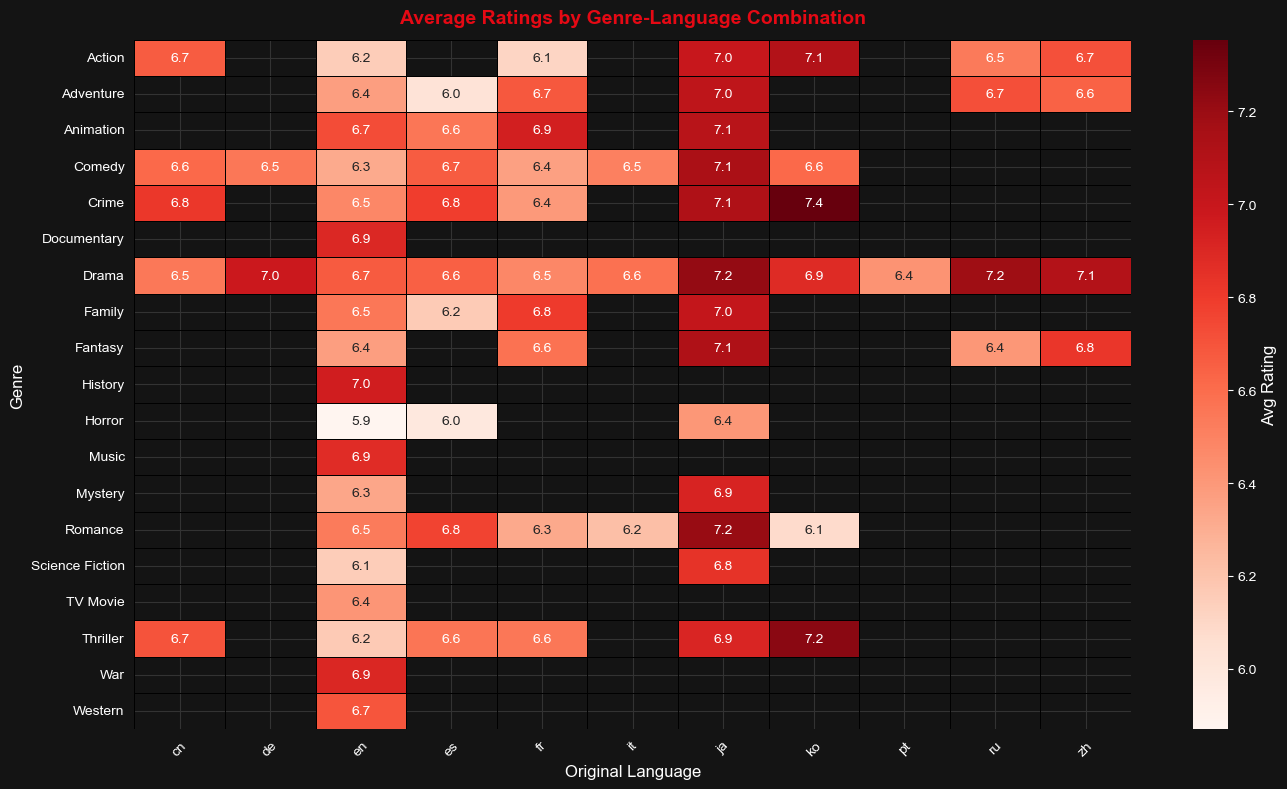

In [114]:
# Grouping by Genre and Language, compute average rating and count
grouped = genre_df.groupby(['Genre_List', 'Original_Language']).agg({
    'Vote_Average': 'mean',
    'Title': 'count'
}).reset_index().rename(columns={'Title': 'Movie_Count', 'Vote_Average': 'Avg_Rating'})

#  Filtering to combinations with at least 20 movies
filtered_combo = grouped[grouped['Movie_Count'] >= 20]

#  Creating pivot table for heatmap
pivot = filtered_combo.pivot(index='Genre_List', columns='Original_Language', values='Avg_Rating')

#  Plotting heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="Reds", linewidths=0.5, linecolor='black', cbar_kws={'label': 'Avg Rating'})
plt.title("Average Ratings by Genre-Language Combination", fontsize=14, color='#E50914', pad=12)
plt.xlabel("Original Language")
plt.ylabel("Genre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Certain genre-language combinations have a stronger cultural or regional appeal, indicating that both content type and linguistic context significantly influence a movie's success.Like almost all the genre in Japanese have rating above 7.0. 

## Unsupervised Learning: Clustering Movies into Content-Based Groups

first lets discover meaningful clusters of similar movies based on their numeric characterstics.

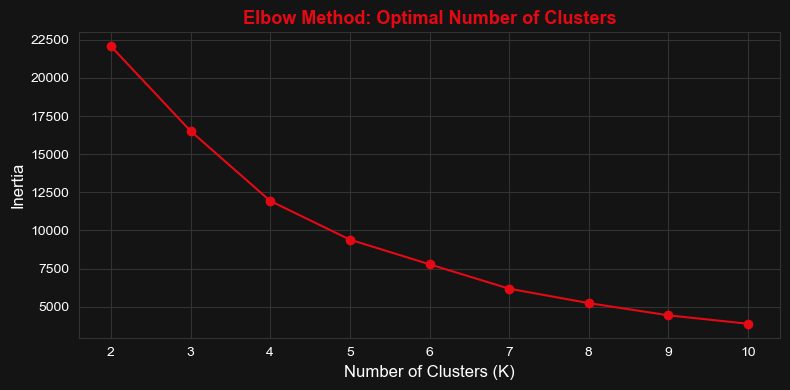

In [123]:
# Selecting numeric features
features = ['Vote_Average', 'Popularity', 'Vote_Count']
X = df[features].copy()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters (K) using elbow method
inertia = []
k_range = range(2,11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting elbow curve 
plt.figure(figsize = (8,4))
plt.plot(k_range, inertia, marker='o', color='#E50914')
plt.title('Elbow Method: Optimal Number of Clusters', fontsize=13, color = netflix_palette['primary'], weight='bold')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()

So from the elbow curve, the inertia drops sharply until K=4 or K=5, and then begins to flatten. This elbow bend indicates a good number of clusters: 
<br>
 - K =4 or 5 is likely optimal for our data.
 - Anything beyond this provides less improvement, increasing complexity without much gain.

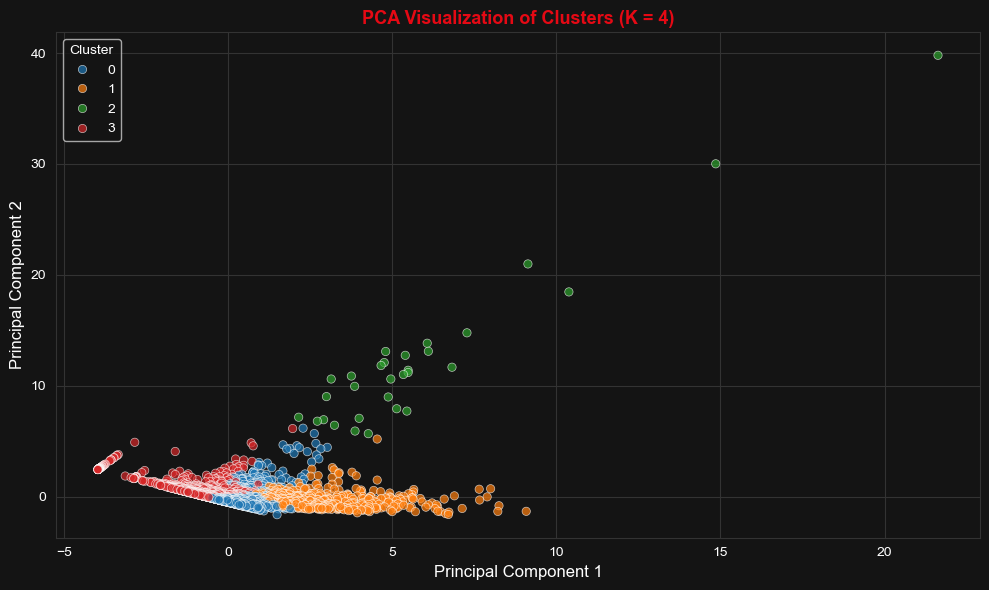

In [130]:

# Applying PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

#  Create a DataFrame for plotting
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

#  Plot clusters in PCA space
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=pca_df, x='PC1', y='PC2', hue='Cluster',
    palette='tab10', alpha=0.7
)
plt.title("PCA Visualization of Clusters (K = 4)", fontsize=13, color='#E50914', fontweight='bold')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


Cluster Centers (Standardized Scale): 
   Vote_Average  Popularity  Vote_Count
0      0.449277   -0.056698   -0.133365
1      0.793606    0.435695    3.303024
2      0.227611   14.038317    0.075842
3     -1.034508   -0.102303   -0.333326


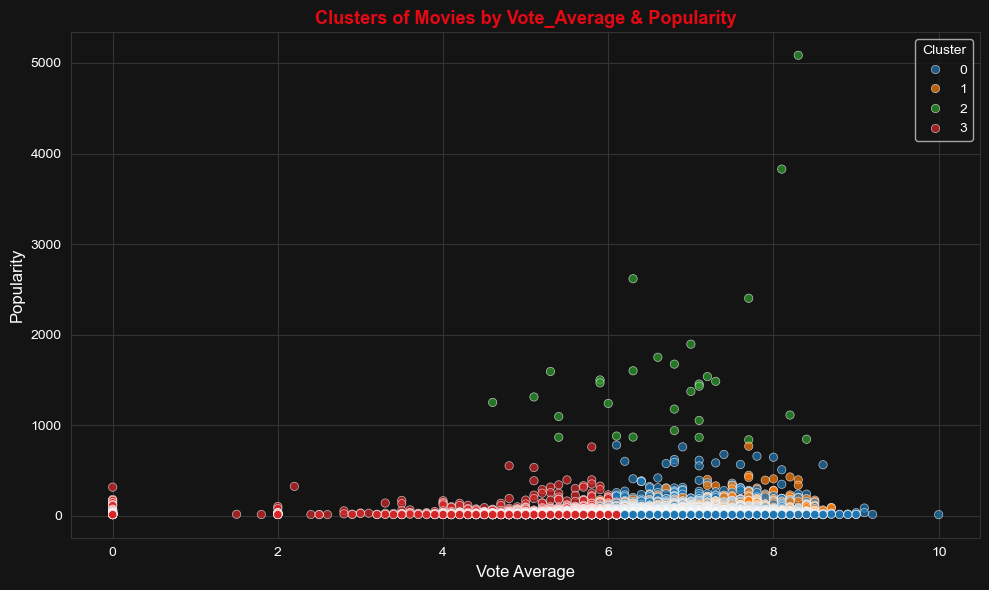

In [126]:
# Applying KMeans with K=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Inspecting cluster centers (scaled)
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = features)
print("Cluster Centers (Standardized Scale): ")
print(centroids)

# Visualizeing cluster in 2D
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='Vote_Average', y='Popularity', hue='Cluster',
    data = df, palette='tab10', alpha = 0.7
)
plt.title("Clusters of Movies by Vote_Average & Popularity", fontsize = 13, color = '#E50914', fontweight = 'bold')
plt.xlabel("Vote Average")
plt.ylabel("Popularity")
plt.legend(title = "Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()


In [128]:
# Cluster-wise summary
cluster_summary = df.groupby('Cluster')[features].mean().round(2)
print("\nCluster Summary (Mean of Features):")
display(cluster_summary)


Cluster Summary (Mean of Features):


,Vote_Average,Popularity,Vote_Count
Cluster,,,
0,6.95,34.15,1043.88
1,7.34,87.70,10000.94
2,6.70,1568.66,1590.83
3,5.27,29.17,520.01


To uncover natural groupings in thsi dataset, we applied KMeans clustering on standardized numerical features (Vote_Average, Popularity, and Vote_Count). Using the elbow method, we determined that 4 clusters provide a good balance between model simplicity and seperation.<br>

**Observations :** <br>
- **Cluster 0** : Represents moderately rated and moderately popular movies with medium vote counts.
- **Cluster 1** : Contains highly rated and well-voted movies with above-average popularity — likely audience favorites.
- **Cluster 2** : Includes extremely popular but not necessarily highly rated movies — suggests commercial hits or viral trends.
- **Cluster 3** : Comprises low-rated and less voted movies — likely overlooked or critically underperforming films.

<br>

Lets try to understand what types of movies (in terms of genres and languages) dominate in each numeric cluster. 

In [136]:
# Exploding Gener_List 
df_exploded = df.copy()
df_exploded = df_exploded.explode('Genre_List')

# Counting top genres in each cluster
top_genres = (
    df_exploded.groupby('Cluster')['Genre_List']
    .value_counts(normalize=True)
    .rename('Percentage')
    .mul(100)
    .reset_index()
)

# Displaying top 5 genres per cluster
for cluster_id in sorted(df['Cluster'].unique()):
    print(f"\n Top Genres in Cluster {cluster_id}")
    display(top_genres[top_genres['Cluster'] == cluster_id].head(5))


 Top Genres in Cluster 0


,Cluster,Genre_List,Percentage
0,0,Drama,16.588286
1,0,Comedy,11.427350
2,0,Action,9.338545
3,0,Thriller,8.208636
4,0,Animation,7.060404



 Top Genres in Cluster 1


,Cluster,Genre_List,Percentage
19,1,Action,14.371981
20,1,Adventure,14.371981
21,1,Drama,12.198068
22,1,Science Fiction,9.299517
23,1,Fantasy,8.393720



 Top Genres in Cluster 2


,Cluster,Genre_List,Percentage
36,2,Action,18.604651
37,2,Thriller,15.116279
38,2,Adventure,11.627907
39,2,Crime,10.465116
40,2,Comedy,8.139535



 Top Genres in Cluster 3


,Cluster,Genre_List,Percentage
50,3,Comedy,13.219588
51,3,Thriller,13.076322
52,3,Action,11.760875
53,3,Drama,10.731961
54,3,Horror,10.328210


To better interpret the meaning of each cluster, we profiled them by analyzing dominant genres and original languages within each cluster:<br>

**Genre Distribution Across Clusters** <br>
- **Cluster 0** : Primarily features Drama, Comedy and Action genres, indicating a general mix with moderately rated and modestly popular movies.
- **Cluster 1** : Rich in Action, Adventure, and Drama, possibly representing higher-rated, widely appealing blockbusters.
- **Cluster 2** : Dominated by Action, Thriller, and Adventure, typically reflecting more popular, high-engagement films.
- **Cluster 3** : Skews towards Comedy, Thriller, Action, and Drama, showing a blend of lower-rated or niche genre films.

In [140]:
# Counting top languages in each cluster
top_languages = (
    df.groupby('Cluster')['Original_Language']
    .value_counts(normalize=True)
    .rename('Percentage')
    .mul(100)
    .reset_index()
)

# Displaying top 5 languages per cluster
for cluster_id in sorted(df['Cluster'].unique()):
    print(f"\n Top Languages in Cluster {cluster_id}")
    display(top_languages[top_languages['Cluster'] == cluster_id].head(5))



 Top Languages in Cluster 0


,Cluster,Original_Language,Percentage
0,0,en,71.579805
1,0,ja,9.136808
2,0,es,4.087948
3,0,fr,3.192182
4,0,ko,2.247557



 Top Languages in Cluster 1


,Cluster,Original_Language,Percentage
39,1,en,97.153025
40,1,ja,0.889680
41,1,ko,0.711744
42,1,fr,0.355872
43,1,it,0.355872



 Top Languages in Cluster 2


,Cluster,Original_Language,Percentage
47,2,en,86.666667
48,2,ja,6.666667
49,2,fr,3.333333
50,2,hi,3.333333



 Top Languages in Cluster 3


,Cluster,Original_Language,Percentage
51,3,en,84.103393
52,3,fr,3.004847
53,3,es,2.810985
54,3,ja,2.487884
55,3,it,1.163166


**Language Distribution Across Clusters**
- **English (en)**  is overwhelmingly dominant across all clusters.
- **Japanese (ja)** and **Spanish (es)** appear modestly in Cluster 0 and 3.
- **Cluster 1** shows the highest concentration of English-language films (~97%), likely indicating globally distributed, mainstream titles.

Now we will cluster movies based on similarities in their overview descriptions (plot summaries), to identify thematic groupings like "family drama", "sci-fi adventure", or "crime thrillers".

In [156]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harshbajpai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/harshbajpai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/harshbajpai/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/harshbajpai/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [158]:
# Defining Stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    #Lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Removing stopwords and lemmatize
    cleaned = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) >2]
    return ' '.join(cleaned)

In [160]:
# Applying cleaning to overview column
df['Cleaned_Overview'] = df['Overview'].astype(str).apply(preprocess_text)

In [162]:
df['Cleaned_Overview'].head(3)

0    peter parker unmasked longer able separate nor...
1    second year fighting crime batman uncovers cor...
2    stranded rest stop mountain blizzard recoverin...
Name: Cleaned_Overview, dtype: object

Now we will convert our cleaned movie overviews (text data) into a numeric format that clustering algorithms can understand. We are going to use TF-IDF(Term Frequency—Inverse Document Frequency) to highlight important words in each overview.

In [167]:
# Initializing TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english')

# Fitting and transforming the cleaned overviews
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Cleaned_Overview'])

# Check shape of the matrix
print("TF-IDF Matrix Shape: ", tfidf_matrix.shape)

TF-IDF Matrix Shape:  (9827, 6685)


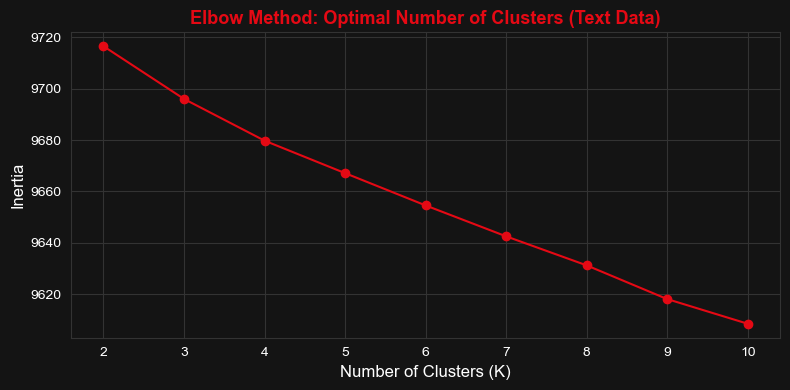

In [175]:
# Define range for number of clusters
k_range = range(2,11)
inertia = []

# Running KMeans for each value of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state = 42, n_init=10)
    kmeans.fit(tfidf_matrix)
    inertia.append(kmeans.inertia_)


# Plotting the elbow curve
plt.figure(figsize=(8,4))
plt.plot(k_range, inertia, marker='o', color='#E50914')
plt.title('Elbow Method: Optimal Number of Clusters (Text Data)', fontsize=13, color='#E50914', weight='bold')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()

Now there is no sharp elbow—the inertia curve decreases smoothly. However, K=4 or K=5 are reasonable points where the curve starts to flatten more subtly. 
<br>
Lets proceed with K=5 for text-based clustering. It will give us finer semantic groupings from the overviews.

In [179]:
# Running KMeans with K = 5
kmeans_text = KMeans(n_clusters = 5, random_state = 42, n_init = 10)
text_clusters = kmeans_text.fit_predict(tfidf_matrix)


# Assigning cluster label back to dataframe
df['Text_Cluster'] = text_clusters

In [181]:
#Getting feature names from TF-IDF
terms = tfidf_vectorizer.get_feature_names_out()

# Getting cluster centers
order_centroids = kmeans_text.cluster_centers_.argsort()[:, ::-1]

# Displaying top 10 terms per cluster
for i in range(5):
    print(f"\n Top terms in Text Cluster {i}:")
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]
    print(", ".join(top_terms))


 Top terms in Text Cluster 0:
world, war, earth, team, mission, planet, battle, force, alien, save

 Top terms in Text Cluster 1:
friend, new, year, story, love, group, help, time, man, film

 Top terms in Text Cluster 2:
young, family, woman, home, father, man, mother, love, son, girl

 Top terms in Text Cluster 3:
school, high, student, girl, teacher, new, friend, senior, year, popular

 Top terms in Text Cluster 4:
life, new, man, love, young, woman, story, friend, world, year


#### Interpretations

- **Cluster 0**: Action/Sci-fi — Keywords like war, battle, alien, planet, mission, team suggest action-packed, possibly military or sci-fi themes.
- **Cluster 1**: General Drama / Friendship / Life Lessons — Keywords like friend, group, help, film, time hint a slice of life or interpersonal stories.
- **Cluster 2**: Family / Parenthood — mother, father, son, girl, family, home indicate familial and emotional dramas.
- **Cluster 3**: School / Teenage life — Keywords like student, teacher, girl, school, high, popular point to coming of age or school-related plots.
- **Cluster 4**: Existential / Life reflections — Mixed general terms like life, love, man, young, story, world suggesting poetic, narrative-heavy plots.

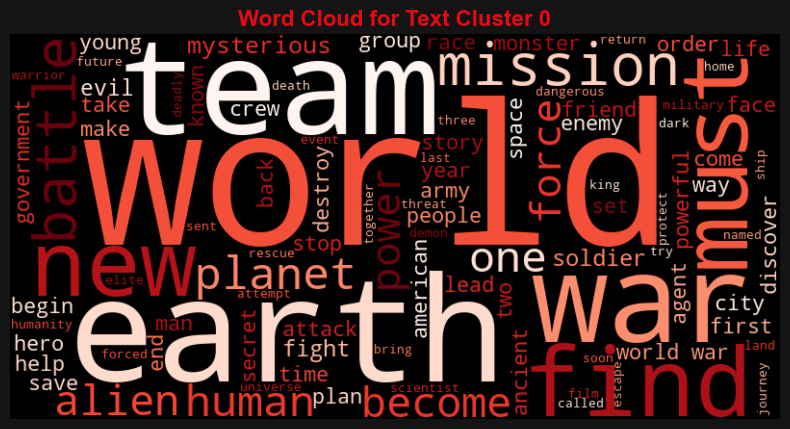

In [192]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and display word cloud for a specific cluster
def plot_wordcloud_for_cluster(cluster_id, df, cluster_col='Text_Cluster', text_col='Cleaned_Overview'):
    text_data = df[df[cluster_col] == cluster_id][text_col].str.cat(sep=' ')
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='black',
        colormap='Reds',
        max_words=100
    ).generate(text_data)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Text Cluster {cluster_id}', fontsize=16, color='#E50914')
    plt.show()

# Generating for Cluster 0
plot_wordcloud_for_cluster(0, df)


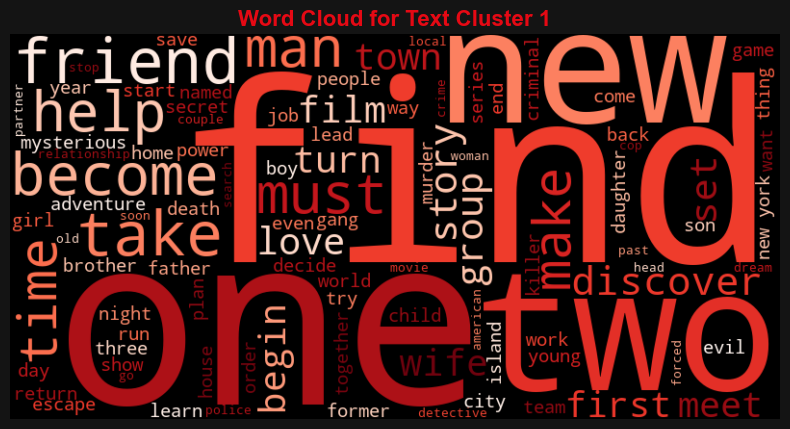

In [196]:
# Generating for Cluster 1
plot_wordcloud_for_cluster(1,df)

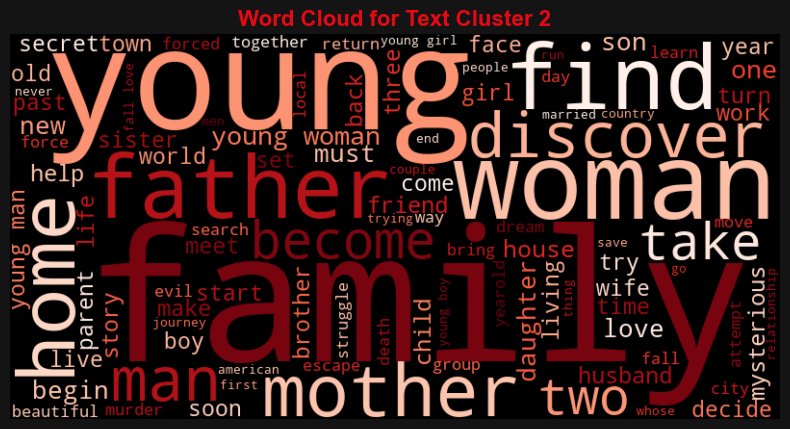

In [198]:
# Generating for Cluster 2
plot_wordcloud_for_cluster(2,df)

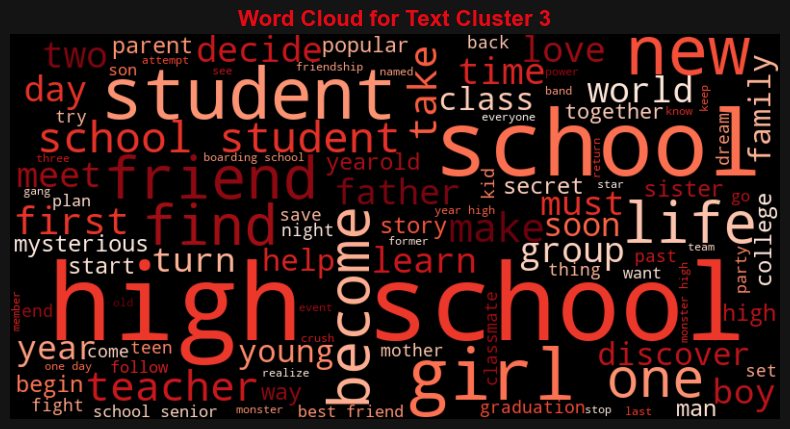

In [200]:
# Generating for Cluster 3
plot_wordcloud_for_cluster(3,df)

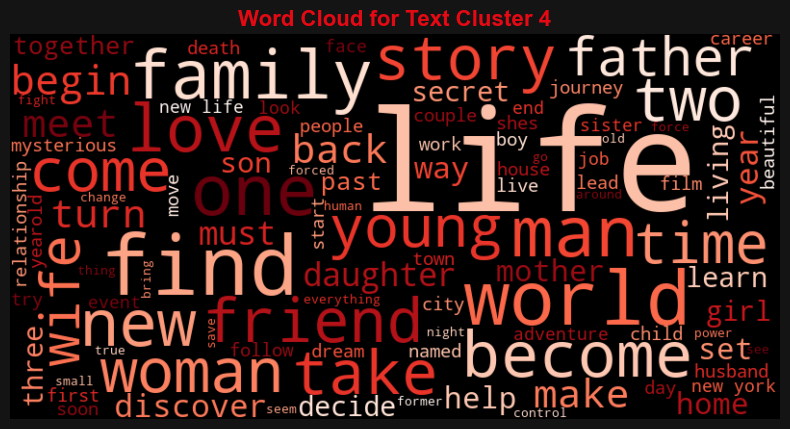

In [202]:
# Generating for Cluster 4
plot_wordcloud_for_cluster(4,df)

In [206]:
# Exploding genre list and grouping by text clusters
df_exploded_text = df.copy()
df_exploded_text = df_exploded_text.explode('Genre_List')

top_genres_text = (
    df_exploded_text.groupby('Text_Cluster')['Genre_List']
    .value_counts(normalize=True)
    .rename('Percentage')
    .mul(100)
    .reset_index()
)

# Displaying top 5 genres per cluster
for cluster_id in sorted(df['Text_Cluster'].unique()):
    print(f"\n Top Genres in Text Cluster {cluster_id}:")
    display(top_genres_text[top_genres_text['Text_Cluster'] == cluster_id].head(5))



 Top Genres in Text Cluster 0:


,Text_Cluster,Genre_List,Percentage
0,0,Action,17.576984
1,0,Science Fiction,12.047651
2,0,Adventure,11.643066
3,0,Drama,8.788492
4,0,Animation,7.394920



 Top Genres in Text Cluster 1:


,Text_Cluster,Genre_List,Percentage
19,1,Comedy,13.025432
20,1,Drama,12.972606
21,1,Action,10.535054
22,1,Thriller,10.331296
23,1,Adventure,7.033431



 Top Genres in Text Cluster 2:


,Text_Cluster,Genre_List,Percentage
38,2,Drama,19.915701
39,2,Thriller,11.643836
40,2,Comedy,10.774499
41,2,Horror,9.246575
42,2,Romance,7.718651



 Top Genres in Text Cluster 3:


,Text_Cluster,Genre_List,Percentage
57,3,Comedy,20.915619
58,3,Drama,17.324955
59,3,Romance,10.053860
60,3,Horror,6.642729
61,3,Family,6.193896



 Top Genres in Text Cluster 4:


,Text_Cluster,Genre_List,Percentage
76,4,Drama,21.520578
77,4,Comedy,12.032674
78,4,Romance,9.739240
79,4,Thriller,8.985234
80,4,Action,6.628966


Lets display the mean values of numberic rating-based features per Text_Cluster:

In [213]:
# Grouping by Text_Cluster and computing average metrics
rating_profile = df.groupby('Text_Cluster')[['Vote_Average', 'Popularity', 'Vote_Count']].mean().round(2)

# Displaying summary
print("\nAverage Rating Stats per Text Cluster:")
display(rating_profile)



Average Rating Stats per Text Cluster:


,Vote_Average,Popularity,Vote_Count
Text_Cluster,,,
0,6.43,50.45,2024.80
1,6.42,37.15,1266.40
2,6.37,41.52,1180.97
3,6.55,34.99,1152.02
4,6.56,42.05,1529.87


**Rating Patterns (per cluster):**
- Cluster 4 had the highest average rating (6.56), followed closely by Cluster 3 (6.55) — both dominated by emotionally rich narratives.
- Cluster 0 had the highest popularity and vote count — likely aligned with mass-market sci-fi/action content.


## Statistical Significance Testing: Do Genres, Language, or Clusters Affect Ratings?

So for this we are going to perform One-way ANOVA tests whether there is a statistically significant difference in means across 3 or more independent groups. It does not tell us which groups differ, only that at least one group's mean is different. We follow it with a Tukey HSD post-hoc test if ANOVA is significant.
<br>
**1. Test: Vote_Average by Genre**

**Hypotheses:**
<br>
- **Null Hypothesis ($H_0$): The average audience rating (Vote_Average) is the same across all genres.**
- **Alternative Hypothesis ($H_1$): At least one genre has a significantly different average rating from the others.**

In [222]:

# Exploding genres and drop duplicates to avoid repetition
genre_ratings = df.explode('Genre_List')[['Genre_List', 'Vote_Average']].dropna()

# Creating a list of Vote_Average per genre
grouped_ratings = [group['Vote_Average'].values for _, group in genre_ratings.groupby('Genre_List')]

# Running one-way ANOVA
f_stat, p_value = f_oneway(*grouped_ratings)

print("ANOVA Test: Vote_Average by Genre")
print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value:.5f}")


ANOVA Test: Vote_Average by Genre
F-statistic: 66.850
P-value: 0.00000


P-value < 0.05 -> Reject the null Hypothesis.
<br>
This means: There is a statistically significant difference in average audience ratings across genres.
<br>
So now lets run a post-hoc test (Tukey's HSD) to find out which genres differ from each other.

In [227]:
# Runing Tukey HSD post-hoc test on Vote_Average across genres
tukey_result = pairwise_tukeyhsd(endog=genre_ratings['Vote_Average'],
                                 groups=genre_ratings['Genre_List'],
                                 alpha=0.05)

# Printting the summary
print(tukey_result.summary())


         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
         Action       Adventure   0.1265 0.0118  0.0131  0.2398   True
         Action       Animation   0.5163    0.0  0.3937  0.6389   True
         Action          Comedy   0.0527 0.9376 -0.0468  0.1522  False
         Action           Crime   0.2217    0.0   0.093  0.3505   True
         Action     Documentary   0.3335 0.0016  0.0674  0.5995   True
         Action           Drama   0.3759    0.0   0.281  0.4708   True
         Action          Family   0.2508    0.0  0.1275  0.3741   True
         Action         Fantasy    0.196    0.0  0.0695  0.3226   True
         Action         History   0.6353    0.0  0.4398  0.8308   True
         Action          Horror  -0.3902    0.0  -0.512 -0.2684   True
         Action           Music   0.5491    0.0  0.3188  0.7793   True
      

All the groups with reject = True are pairs of genres with significantly different audience ratings.

In [230]:
# Number of significant genre pairs
significant_pairs = tukey_result.reject.sum()
print(f"Number of genre pairs with significantly different average ratings: {significant_pairs}")


Number of genre pairs with significantly different average ratings: 107


In [236]:
# Converting results to DataFrame
tukey_df = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0])

# Filtering significant rows
significant = tukey_df[tukey_df['reject'] == True]

# Counting how often each genre appears in significant results
from collections import Counter
genre_counts = Counter(significant['group1'].tolist() + significant['group2'].tolist())
top_genres = genre_counts.most_common(5)
print("Genres involved in most significant differences:")
for genre, count in top_genres:
    print(f"{genre}: {count} comparisons")


Genres involved in most significant differences:
Horror: 18 comparisons
Drama: 15 comparisons
Science Fiction: 15 comparisons
Thriller: 15 comparisons
Comedy: 14 comparisons


In [238]:
# Top positive differences (group1 rated much higher than group2)
print("Top 5 genre pairs where group1 is rated significantly higher:")
display(significant.sort_values(by='meandiff', ascending=False).head(5))

# Top negative differences (group1 rated significantly lower)
print("Top 5 genre pairs where group1 is rated significantly lower:")
display(significant.sort_values(by='meandiff').head(5))


Top 5 genre pairs where group1 is rated significantly higher:


,group1,group2,meandiff,p-adj,lower,upper,reject
141,Horror,War,1.0086,0.0,0.7734,1.2438,True
135,Horror,Music,0.9393,0.0,0.6998,1.1787,True
142,Horror,Western,0.8147,0.0,0.4794,1.1500,True
168,Thriller,War,0.7026,0.0,0.4758,0.9293,True
163,Science Fiction,War,0.6913,0.0,0.4529,0.9296,True


Top 5 genre pairs where group1 is rated significantly lower:


,group1,group2,meandiff,p-adj,lower,upper,reject
126,History,Horror,-1.0255,0.0,-1.2318,-0.8192,True
42,Animation,Horror,-0.9065,0.0,-1.0457,-0.7673,True
96,Drama,Horror,-0.7661,0.0,-0.8816,-0.6506,True
84,Documentary,Horror,-0.7237,0.0,-0.9977,-0.4496,True
132,History,Thriller,-0.7194,0.0,-0.9160,-0.5228,True


**2. Test: Popularity Across Genres**
**Hypotheses**
- **Null Hypothesis ($H_0$): The average popularity is the same across all genres.**
- **Alternative Hypothesis ($H_1$): At least one genre has a significantly different average popularity.**

In [241]:

# Preparing the data
popularity_data = df.explode('Genre_List')[['Genre_List', 'Popularity']].dropna()
grouped_popularity = [group['Popularity'].values for _, group in popularity_data.groupby('Genre_List')]

# Running one-way ANOVA
f_stat_pop, p_value_pop = f_oneway(*grouped_popularity)

print("ANOVA Test: Popularity by Genre")
print(f"F-statistic: {f_stat_pop:.3f}")
print(f"P-value: {p_value_pop:.5f}")


ANOVA Test: Popularity by Genre
F-statistic: 8.137
P-value: 0.00000


Since the p-values < 0.05 here also, we reject the null hypothesis.
<br>
This confirms that at least one genre has a significantly different average popularity. So we perform Tukey's HSD post-hoc test for popularity to see which genre pairs differ significantly.

In [246]:
# Tukey's HSD Test
tukey_pop = pairwise_tukeyhsd(endog=popularity_data['Popularity'],
                              groups=popularity_data['Genre_List'],
                              alpha=0.05)

# Summary Table
print(tukey_pop)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1          group2     meandiff p-adj   lower    upper   reject
------------------------------------------------------------------------
         Action       Adventure   2.8528    1.0  -9.1567  14.8622  False
         Action       Animation   1.5437    1.0 -11.4479  14.5353  False
         Action          Comedy -13.0165 0.0021 -23.5548  -2.4781   True
         Action           Crime  -6.1428 0.9876 -19.7889   7.5032  False
         Action     Documentary -21.6548 0.4027  -49.841   6.5315  False
         Action           Drama -20.8125    0.0 -30.8684 -10.7566   True
         Action          Family  -4.2795 0.9998 -17.3457   8.7867  False
         Action         Fantasy   2.1912    1.0 -11.2174  15.5998  False
         Action         History -22.4943 0.0176 -43.2128  -1.7758   True
         Action          Horror -12.6256 0.0636 -25.5278   0.2765  False
         Action           Music -17.1187 0.5823  -4

In [250]:
# Converting to DataFrame
tukey_df_pop = pd.DataFrame(data=tukey_pop._results_table.data[1:], columns=tukey_pop._results_table.data[0])

# Filtering significant results
significant_pop = tukey_df_pop[tukey_df_pop['reject'] == True]

# Counting total significant differences
print(f"\nNumber of genre pairs with significantly different popularity: {significant_pop.shape[0]}")


Number of genre pairs with significantly different popularity: 23


In [252]:
# Finding top genres involved in most differences
genre_counts_pop = Counter(significant_pop['group1'].tolist() + significant_pop['group2'].tolist())
top_genres_pop = genre_counts_pop.most_common(5)

print("\nGenres involved in most popularity differences:")
for genre, count in top_genres_pop:
    print(f"{genre}: {count} comparisons")

# Top 5 positive and negative differences
print("\nTop 5 genre pairs where group1 is significantly more popular than group2:")
display(significant_pop.sort_values(by='meandiff', ascending=False).head())

print("\nTop 5 genre pairs where group1 is significantly less popular than group2:")
display(significant_pop.sort_values(by='meandiff').head())


Genres involved in most popularity differences:
Drama: 8 comparisons
Romance: 6 comparisons
Adventure: 5 comparisons
Action: 4 comparisons
Animation: 4 comparisons

Top 5 genre pairs where group1 is significantly more popular than group2:


,group1,group2,meandiff,p-adj,lower,upper,reject
94,Drama,Fantasy,23.0037,0.0000,10.2306,35.7767,True
100,Drama,Science Fiction,19.4337,0.0000,6.5311,32.3362,True
156,Romance,Science Fiction,18.6453,0.0024,3.4340,33.8566,True
93,Drama,Family,16.5330,0.0004,4.1198,28.9461,True
55,Comedy,Fantasy,15.2077,0.0068,2.0514,28.3640,True



Top 5 genre pairs where group1 is significantly less popular than group2:


,group1,group2,meandiff,p-adj,lower,upper,reject
25,Adventure,History,-25.3471,0.0043,-46.6947,-3.9994,True
116,Fantasy,History,-24.6855,0.0121,-46.8505,-2.5206,True
41,Animation,History,-24.0380,0.0152,-45.9533,-2.1228,True
22,Adventure,Drama,-23.6652,0.0000,-34.9608,-12.3697,True
29,Adventure,Romance,-22.8769,0.0000,-36.7512,-9.0026,True


To validate our earlier observations on how audience ratings and popularity vary across genres, we conducted statistical hypothesis testing using One-Way ANOVA followed by Tukey's HSD post-hoc analysis.
<br>
- **Audience Ratings (Vote_Average)**:
  The ANOVA test confirmed that average audience ratings differ significantly across genres (p-value < 0.001). Tukey's HSD further revealed 107 genre pairs with significant differences. Genres like Horror, Drama, Sci-Fi, and Thriller appeared most frequently in these differences, suggesting polarized viewer opinions.

- **Popularity Scores**:
  Similarly, we found significant variation in movie popularity across genres (p-value < 0.001). Tukey's HSD identified 23 genre pairs with significant differences. Notably, Drama and Romance appeared often in both highly and less popular pairs, suggesting genre-specific audience dynamics.


- **Key insights:**
  - Horror films tend to evoke stronger audience reactions—both positive and negative.
  - Drama and Romance show wide variablity in both ratings and popularity.
  - Adventure films showed lower popularity compared to many genres, including Drama and Fantasy.

<br>
These test provide statistically sound evidence that genre plays a critical role in shaping how films are received, both in terms of quality perception and overall engagement.

## Text-Based Theme Discovery: Topic Modeling on Movie Overviews (LDA)

In this section we will discover hidden topics or themes that are commonly present in movie overviews — and see:
- What kind of narrative appear most in high-rated or low-rated movies.
- Whether clusters of themes can be inferred from descriptions
- What type of language (e.g., mission, family, war, future) dominates which group.

In [277]:
# Stopwords
stop_words = set(stopwords.words('english'))

# Preprocessing the 'Overview' column
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text) # Removign punctuation
    words = text.split()
    words = [word for word in words if word not in stop_words and len(word) >2]
    return ' '.join(words)

df['Clean_Overview'] = df['Overview'].fillna('').apply(preprocess_text)

# Creating Document-term matrix
vectorizer = CountVectorizer(max_df = 0.9, min_df=10, stop_words='english')
dtm = vectorizer.fit_transform(df['Clean_Overview'])


# Fitting LDA Model
lda_model = LatentDirichletAllocation(n_components = 5, random_state = 42)
lda_model.fit(dtm)

# Displaying top words in Each topic
def print_top_words(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\n Topic #{topic_idx}:")
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(" - " + ", ".join(top_words))

print_top_words(lda_model, vectorizer.get_feature_names_out())


 Topic #0:
 - young, life, family, woman, home, man, new, mother, father, wife

 Topic #1:
 - war, world, team, mission, agent, group, earth, battle, new, save

 Topic #2:
 - school, high, life, friends, love, girl, gets, student, new, friend

 Topic #3:
 - new, life, young, town, gang, love, city, way, small, story

 Topic #4:
 - world, new, film, story, king, evil, time, life, adventure, love


In [279]:
# getting topic distribution for each document
topic_distribution = lda_model.transform(dtm)

# Assign the dominant topic (highest probability) to each moveie
df['Dominant_Topic'] = topic_distribution.argmax(axis=1)

# Adding topic probability too
df['Topic_Confidence'] = topic_distribution.max(axis=1)

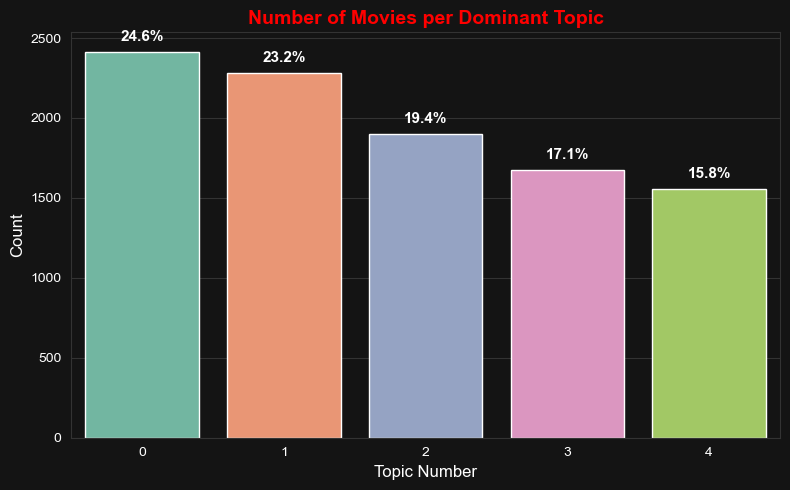

In [283]:
# Visualizing distribution of topics
# Counting the number of movies per dominant topic
topic_counts = df['Dominant_Topic'].value_counts().sort_index()
total_movies = len(df)

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=topic_counts.index, y=topic_counts.values, palette='Set2')

# Adding percentages on top
for i, count in enumerate(topic_counts.values):
    percentage = (count / total_movies) * 100
    ax.text(i, count + 50, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=11, color='white', fontweight='bold')

plt.title("Number of Movies per Dominant Topic", fontsize=14, color='red', weight='bold')
plt.xlabel("Topic Number")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [275]:
# Grouping by topic and calculating mean rating and popularity
topic_profile = df.groupby('Dominant_Topic')[['Vote_Average', 'Popularity']].mean().round(2)
print("\n Average Rating and Popularity per Topic:")
display(topic_profile)


 Average Rating and Popularity per Topic:


,Vote_Average,Popularity
Dominant_Topic,,
0,6.37,40.14
1,6.42,44.92
2,6.42,34.41
3,6.46,35.91
4,6.58,45.89


Using Latent Dirichlet Allocation (LDA) on movie overviews, we uncovered 5 dominant narrative themes. Each movie was assigned a dominant topic based on the highest topic probability. The most common themes involved family & youth, war & mission, school & friendship, urban life & gangs, and fantasy & adventure.

we found:
- Topic #0 (family/youty) is the most frequent (24.6% of movies).
- Topic #4 (fantasy/adventure) has the highest average rating (6.58) and popularity (45.89).
- This highlights how narrative themes impact movie success, complementing genre-based analysis with deeper textual insights.

## Project Summary

- Analyzed 10,000+ movies using metadata (genre, language, ratings, popularity, keywords).
- Tracked release trends over time; found sharp post-2000 rise in movie production.
- Identified English as the dominant language; exlored diversity via multilingual content.
- Exploded multi-genre tags to rank most-used genres; Drama, comedy, and Thriller topped the list.
- Found most movies rated between 5 and 7.5; average rating isn't strongly tied to popularity.
- Used scatter plots to compare vote count, ratings, and popularity—highlighting engagement trends.
- Analyzed success by genre;
- Tracked genre evolution over decades
- Extracted frequent keywords/themes using NLP to uncover common storytelling elements.
- Applied KMeans clustering to group movies based on success metrics; Identified 4 distinct content types.
- Highlighted Storyteling, trends, and audience preferences for content strategy insights.


## Business Recommendations

- **Leverage rising genres like Sci-Fi and Animation:**
  These genres have shown noticeable growth in recent years, making them ideal for youth-oriented and trend-driven content strategies.
- **Focus on High-impact narrative themes:**
  Themes like family, revenge, true story, and survival appeared frequently in top-rated movies. Developing content around such emotionally resonant topics can enhance audience engagement.
- **Develop a hybrid success metric:**
  Rather than relying solely on popularity or ratings, combining factors like popularity, votecount and average rating can help make more informed content acquisition and promotion decisions.
- **Promote underratted but high-quality content:**
  Some movies receive excellent ratings but lack visibility. Highlighting such content through featured lists or editorial curation could improve user satisfaction and long-tail viewership.


## Future Improvements

- As an extention, I aim to implement a content-based recommender using genres, ratings, or narrative similarity.
- I would like to convert this notebook into an interactive web application using Flask or Streamlit, allowing others to explore the data and insights dynamically.
